Effect of educational intervention on breast cancer prevention

In recent times, nutrition has played a more significant role in understanding the causes of breast cancer. Therefore,focusing on nutrition-related factors linked to breast cancer risk or prevention could serve as a crucial intervention for breast cancer prevention. This project examined participants' attitude towards breast cancer prevention. The study was conducted in two segments. First, the participants' current nutrition-related attitude was assessed. Then, an educational intervention about breast cancer prevention was carried out. After the intervention, participants were re-evaluated to assess the impact of the nutrition education on their attitude. This study compared participants' attitude before and after the educational intervention and analyzed influencing factors using a chi-square test.

In [1]:
import pandas as pd

loading the dataset and viewing the first five rows

In [2]:
pre_attitude=pd.read_csv('Attitude-preseminar.csv',delimiter=';')
pre_attitude.head()

,Age,Marital Status,Religion,Ethnicity,Faculty,level,Permanent residence,Family degree of breast cancer,Do you belief regular consumption of vegetable can reduce risk of breast cancer?,\tDo you belief regular consumption of fruit can reduce the risk of breast cancer?,\tDo you belief breastfeeding can reduce the risk of breast cancer?,\tDo you belief that consumption of healthy diet can reduce the risk of breast?,\tDo you belief avoidance of smoking can reduce the risk of breast cancer?,\tDo you believe that maternal nutrition during pregnancy can increase daughter risk of breast cancer in the future?,\tDo you belief that father nutrition during preconception can increase daughter risk of breast cancer in the future?,Do you believe that alcohol consumption can increase the risk of breast cancer?,Do you believe frequent physical exercise can reduce the risk of breast cancer?,Do you believe maintaining a healthy weight can reduce the risk of breast cancer?
0,22,Single,Muslim,Yoruba,Agriculture,300,Rural,No family history,I agree,I don’t know,I don’t know,I don’t know,I agree,I disagree,I disagree,I agree,I agree,I don't know
1,19,Single,Muslim,Yoruba,Agriculture,300,Urban,No family history,I agree,I agree,I strongly agree,I strongly agree,I agree,I don’t know,I strongly disagree,I agree,I strongly agree,I agree
2,20,Single,Christian,Yoruba,Agriculture,200,Rural,No family history,I don't know,I agree,I don’t know,I agree,I strongly agree,I agree,I disagree,I agree,I don't know,I don't know
3,22,Others,Christian,Yoruba,Agriculture,300,Urban,No family history,I agree,I agree,I strongly agree,I strongly agree,I strongly agree,I don’t know,I don’t know,I strongly agree,I agree,I agree
4,21,Single,Christian,Yoruba,Agriculture,300,Urban,No family history,I agree,I agree,I agree,I agree,I strongly agree,I disagree,I don’t know,I agree,I agree,I don't know


In [3]:
pre_attitude.columns=pre_attitude.columns.str.strip()

concatenating all the dependent variables

In [4]:
columns=['Do you belief regular consumption of vegetable can reduce risk of breast cancer?','Do you belief regular consumption of fruit can reduce the risk of breast cancer?','Do you belief breastfeeding can reduce the risk of breast cancer?','Do you belief that consumption of healthy diet can reduce the risk of breast?','Do you belief avoidance of smoking can reduce the risk of breast cancer?','Do you believe that maternal nutrition during pregnancy can increase daughter risk of breast cancer in the future?','Do you belief that father nutrition during preconception can increase daughter risk of breast cancer in the future?','Do you believe that alcohol consumption can increase the risk of breast cancer?','Do you believe frequent physical exercise can reduce the risk of breast cancer?','Do you believe maintaining a healthy weight can reduce the risk of breast cancer?']

In [5]:
attitude_pre=pd.concat([pre_attitude[col] for col in columns],axis=1)
attitude_pre.head(2)

,Do you belief regular consumption of vegetable can reduce risk of breast cancer?,Do you belief regular consumption of fruit can reduce the risk of breast cancer?,Do you belief breastfeeding can reduce the risk of breast cancer?,Do you belief that consumption of healthy diet can reduce the risk of breast?,Do you belief avoidance of smoking can reduce the risk of breast cancer?,Do you believe that maternal nutrition during pregnancy can increase daughter risk of breast cancer in the future?,Do you belief that father nutrition during preconception can increase daughter risk of breast cancer in the future?,Do you believe that alcohol consumption can increase the risk of breast cancer?,Do you believe frequent physical exercise can reduce the risk of breast cancer?,Do you believe maintaining a healthy weight can reduce the risk of breast cancer?
0,I agree,I don’t know,I don’t know,I don’t know,I agree,I disagree,I disagree,I agree,I agree,I don't know
1,I agree,I agree,I strongly agree,I strongly agree,I agree,I don’t know,I strongly disagree,I agree,I strongly agree,I agree


Calculating the correct responses

In [6]:
valid_responses = ['I strongly agree', 'I agree']

calculating the total sum of the dependent variables

In [7]:
filtered_responses = pre_attitude.apply(lambda col: col.map(lambda x: 1 if x in valid_responses else 0))
respondent_totals = filtered_responses.sum(axis=1)
question_totals = filtered_responses.sum(axis=0)
total_correct_answers = filtered_responses.values.sum()

In [8]:
print("Correct answers per respondent:\n", respondent_totals)

Correct answers per respondent:
 0       4
1       8
2       5
3       8
4       7
       ..
145     8
146     6
147     7
148     8
149    10
Length: 150, dtype: int64


In [9]:
attitude_pre['score'] = respondent_totals

In [10]:
#categorizing the level of attitude for each participant
def categorize_attitude(score):
    if score >= 7:
        return "High"
    elif 4 <= score <= 6:
        return "Moderate"
    else:
        return "Low"

In [11]:
attitude_pre['attitude_level_1'] = attitude_pre['score'].apply(categorize_attitude)
attitude_pre[['attitude_level_1']].head()

,attitude_level_1
0,Moderate
1,High
2,Moderate
3,High
4,High


concatenating the independent variables

In [12]:
columns_1=['Age','Marital Status','Religion','Ethnicity','Faculty','level','Permanent residence','Family degree of breast cancer']

In [13]:
demographics=pd.concat([pre_attitude[col] for col in columns_1], axis=1)
demographics.head(2)

,Age,Marital Status,Religion,Ethnicity,Faculty,level,Permanent residence,Family degree of breast cancer
0,22,Single,Muslim,Yoruba,Agriculture,300,Rural,No family history
1,19,Single,Muslim,Yoruba,Agriculture,300,Urban,No family history


In [14]:
#concatenating independent and dependent variables
overall_data=pd.concat([demographics,attitude_pre['attitude_level_1']],axis=1)
overall_data.head(2)

,Age,Marital Status,Religion,Ethnicity,Faculty,level,Permanent residence,Family degree of breast cancer,attitude_level_1
0,22,Single,Muslim,Yoruba,Agriculture,300,Rural,No family history,Moderate
1,19,Single,Muslim,Yoruba,Agriculture,300,Urban,No family history,High


In [15]:
post_attitude=pd.read_csv('post-seminar-attitude.csv',delimiter=';')
post_attitude.head(2)

,Age,Marital Status,Religion,Ethnicity,Faculty,Level,Permanent residence,Family degree of breast cancer,Can regular consumption of vegetable reduce breast cancer risk?,Can regular consumption of fruit reduce breast cancer risk?,Can breastfeeding reduce breast cancer risk?,Can consumption of healthy diet reduce breast cancer risk?,Can avoidance of smoking reduce breast cancer risk?,Can maternal nutrition during pregnancy impact daughter risk of breast cancer in the future?,Can paternal nutrition during preconception increase daughter risk of breast cancer in the future?,Can alcohol consumption increase breast cancer risk?,Can doing regular physical exercise reduce breast cancer risk?,Can maintaining healthy weight reduce breast cancer risk?
0,22,Single,Muslim,Yoruba,Agriculture,300,Rural,No family history,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I disagree,I disagree,I strongly agree,I strongly agree,I strongly agree
1,19,Single,Muslim,Yoruba,Agriculture,300,Urban,No family history,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree


In [16]:
post_attitude.columns=post_attitude.columns.str.strip()

In [17]:
columns=['Can regular consumption of vegetable reduce breast cancer risk?','Can regular consumption of fruit reduce breast cancer risk?','Can breastfeeding reduce breast cancer risk?','Can consumption of healthy diet reduce breast cancer risk?','Can avoidance of smoking reduce breast cancer risk?','Can maternal nutrition during pregnancy  impact daughter risk of breast cancer in the future?','Can paternal nutrition during preconception  increase daughter risk of breast cancer in the future?','Can alcohol consumption  increase breast cancer risk?','Can doing regular physical exercise reduce breast cancer risk?','Can maintaining healthy weight reduce breast cancer risk?']

In [18]:
attitude_sem=pd.concat([post_attitude[col] for col in columns],axis=1)
attitude_sem.head(2)

,Can regular consumption of vegetable reduce breast cancer risk?,Can regular consumption of fruit reduce breast cancer risk?,Can breastfeeding reduce breast cancer risk?,Can consumption of healthy diet reduce breast cancer risk?,Can avoidance of smoking reduce breast cancer risk?,Can maternal nutrition during pregnancy impact daughter risk of breast cancer in the future?,Can paternal nutrition during preconception increase daughter risk of breast cancer in the future?,Can alcohol consumption increase breast cancer risk?,Can doing regular physical exercise reduce breast cancer risk?,Can maintaining healthy weight reduce breast cancer risk?
0,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I disagree,I disagree,I strongly agree,I strongly agree,I strongly agree
1,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree


In [19]:
valid_responses_2 = ['I strongly agree', 'I agree']

In [20]:
filtered_responses_2 = post_attitude.apply(lambda col: col.map(lambda x: 1 if x in valid_responses_2 else 0))
respondent_totals_2 = filtered_responses_2.sum(axis=1)
question_totals_2 = filtered_responses_2.sum(axis=0)
total_correct_answers_2 = filtered_responses_2.values.sum()

In [21]:
print("Correct answers per respondent:\n", respondent_totals_2)

Correct answers per respondent:
 0       8
1      10
2       6
3       7
4       6
       ..
145     8
146    10
147    10
148     7
149     8
Length: 150, dtype: int64


In [22]:
attitude_sem['score'] = respondent_totals_2

In [23]:
def categorize_attitude_2(score):
    if score >= 7:
        return "High"
    elif 4 <= score <= 6:
        return "Moderate"
    else:
        return "Low"

In [24]:
attitude_sem['attitude_level_2'] = attitude_sem['score'].apply(categorize_attitude_2)
attitude_sem[['attitude_level_2']].head()

,attitude_level_2
0,High
1,High
2,Moderate
3,High
4,Moderate


In [25]:
columns_2=['Age','Marital Status','Religion','Ethnicity','Faculty','Level','Permanent residence','Family degree of breast cancer']

In [26]:
demographics_2=pd.concat([post_attitude[col] for col in columns_2], axis=1)
demographics_2.head(2)

,Age,Marital Status,Religion,Ethnicity,Faculty,Level,Permanent residence,Family degree of breast cancer
0,22,Single,Muslim,Yoruba,Agriculture,300,Rural,No family history
1,19,Single,Muslim,Yoruba,Agriculture,300,Urban,No family history


In [27]:
overall_data_2=pd.concat([demographics_2,attitude_sem['attitude_level_2']],axis=1)
overall_data_2.head(2)

,Age,Marital Status,Religion,Ethnicity,Faculty,Level,Permanent residence,Family degree of breast cancer,attitude_level_2
0,22,Single,Muslim,Yoruba,Agriculture,300,Rural,No family history,High
1,19,Single,Muslim,Yoruba,Agriculture,300,Urban,No family history,High


In [28]:
compare_attitude=pd.concat([overall_data,attitude_sem['attitude_level_2']],axis=1)
compare_attitude.head(2)

,Age,Marital Status,Religion,Ethnicity,Faculty,level,Permanent residence,Family degree of breast cancer,attitude_level_1,attitude_level_2
0,22,Single,Muslim,Yoruba,Agriculture,300,Rural,No family history,Moderate,High
1,19,Single,Muslim,Yoruba,Agriculture,300,Urban,No family history,High,High


In [29]:
compare_attitude.to_csv('attitude_level_for_pre_and_post_seminar.csv',index=False,sep=';')

In [30]:
#calculating the totalfor each attitude level
before_intervention_attitude=compare_attitude['attitude_level_1'].value_counts()
after_intervention_attitude=compare_attitude['attitude_level_2'].value_counts()

In [31]:
all_level_1 = ['High', 'Moderate', 'Low']
before_intervention_attitude = before_intervention_attitude.reindex(all_level_1, fill_value=0)
after_intervention_attitude = after_intervention_attitude.reindex(all_level_1, fill_value=0)

In [32]:
#calculating the change in attitude
change_1 = after_intervention_attitude - before_intervention_attitude

In [33]:
#creating the summary table
attitude_summary_table = pd.DataFrame({
    'Attitude Level': all_level_1 + ['Total Participants'],
    'Before (Attitude_Level_1)': list(before_intervention_attitude) + [before_intervention_attitude.sum()],
    'After (Attitude_Level_2)': list(after_intervention_attitude) + [after_intervention_attitude.sum()],
    'Change': list(change_1) + [change_1.sum()]
})

In [34]:
#displaying the summary table
attitude_summary_table

,Attitude Level,Before (Attitude_Level_1),After (Attitude_Level_2),Change
0,High,81,134,53
1,Moderate,51,16,-35
2,Low,18,0,-18
3,Total Participants,150,150,0


In [35]:
attitude_summary_table.to_csv('comparism_of_attitude_before_and_after_the_seminar.csv',index=False,sep=';')

In [36]:
from scipy.stats import chi2_contingency

In [37]:
#calculating chi_square to analyze the relationship between attitude_1 and attitude_2
comparism_attitude = pd.crosstab(compare_attitude['attitude_level_1'], compare_attitude['attitude_level_2'])
chi2, p, dof, expected = chi2_contingency(comparism_attitude)

In [38]:
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 0.12132962637791439
P-Value: 0.9411386441742494
Degrees of Freedom: 2
Expected Frequencies:
 [[72.36  8.64]
 [16.08  1.92]
 [45.56  5.44]]


Analysing the influencing factors of the participants attitude towards breast cancer prevention using chi-square to see if there is any relationship

In [39]:
#Creating age groups (Age ≤ 23 and Age ≥ 24)
compare_attitude['Age_Group'] = compare_attitude['Age'].apply(lambda x: '≤ 23' if x <= 23 else '≥ 24')

In [40]:
#Combining the attitude levels
compare_attitude['Combined_attitude'] = compare_attitude[['attitude_level_1', 'attitude_level_2']].max(axis=1)

In [41]:
#Grouping by Age Group and Combined attitude to count occurrences
attitude_counts = compare_attitude.groupby(['Age_Group', 'Combined_attitude']).size().unstack(fill_value=0)

In [42]:
# Calculating the percentage for each attitude level within each age group
attitude_percentage_age = attitude_counts.div(attitude_counts.sum(axis=1), axis=0) * 100
attitude_percentage_age

Combined_attitude,High,Low,Moderate
Age_Group,,,
≤ 23,49.586777,8.264463,42.148760
≥ 24,44.827586,20.689655,34.482759


In [43]:
attitude_percentage_age.to_csv('age_demographic_relationship_and_attitude.csv',index=False,sep=';')

In [44]:
relationship_table = pd.crosstab(compare_attitude['Age_Group'], compare_attitude['Combined_attitude'])
chi2_stat, p_val, dof, expected = chi2_contingency(relationship_table)

In [45]:
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Chi-Square Test Results:
Chi-Square Statistic: 3.8327976624479208
P-value: 0.1471358703169558
Degrees of Freedom: 2
Expected Frequencies:
[[58.88666667 12.90666667 49.20666667]
 [14.11333333  3.09333333 11.79333333]]


In [46]:
#creating marital status group
compare_attitude['Marital_Status_Group'] = compare_attitude['Marital Status'].apply(lambda x: 'Single' if x == 'Single' else ('Married' if x == 'Married' else 'Others'))


In [47]:
compare_attitude['Combined_attitude'] = compare_attitude[['attitude_level_1','attitude_level_2']].max(axis=1)

In [48]:
attitude_counts = compare_attitude.groupby(['Marital_Status_Group', 'Combined_attitude']).size().unstack(fill_value=0)

In [49]:
attitude_percentage_marital = attitude_counts.div(attitude_counts.sum(axis=1), axis=0) * 100
attitude_percentage_marital

Combined_attitude,High,Low,Moderate
Marital_Status_Group,,,
Married,33.333333,33.333333,33.333333
Others,25.000000,0.000000,75.000000
Single,49.650350,10.489510,39.860140


In [50]:
attitude_percentage_marital.to_csv('marital_status_demographic_relationship_and_attitude.csv',index=False,sep=';')

In [51]:
relationship_table = pd.crosstab(compare_attitude['Marital_Status_Group'], compare_attitude['Combined_attitude'])
chi2_stat, p_val, dof, expected = chi2_contingency(relationship_table)

In [52]:
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Chi-Square Test Results:
Chi-Square Statistic: 3.731602722451588
P-value: 0.44354618596534734
Degrees of Freedom: 4
Expected Frequencies:
[[ 1.46        0.32        1.22      ]
 [ 1.94666667  0.42666667  1.62666667]
 [69.59333333 15.25333333 58.15333333]]


In [53]:
#creating Religion group to compare the relationship with attitude of the participants
compare_attitude['Religion_Group'] = compare_attitude['Religion'].apply(lambda x: 'Muslim' if x == 'Muslim' else 'Christian')

In [54]:
compare_attitude['Combined_attitude'] = compare_attitude[['attitude_level_1','attitude_level_2']].max(axis=1)

In [55]:
attitude_counts = compare_attitude.groupby(['Religion_Group', 'Combined_attitude']).size().unstack(fill_value=0)

In [56]:
attitude_percentage_religion = attitude_counts.div(attitude_counts.sum(axis=1), axis=0) * 100
attitude_percentage_religion

Combined_attitude,High,Low,Moderate
Religion_Group,,,
Christian,48.507463,11.940299,39.552239
Muslim,50.000000,0.000000,50.000000


In [57]:
attitude_percentage_religion.to_csv('religion_status_demographic_relationship_and_attitude.csv',index=False,sep=';')

In [58]:
relationship_table = pd.crosstab(compare_attitude['Religion_Group'], compare_attitude['Combined_attitude'])
chi2_stat, p_val, dof, expected = chi2_contingency(relationship_table)

In [59]:
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Chi-Square Test Results:
Chi-Square Statistic: 2.3006458835398576
P-value: 0.3165345306497921
Degrees of Freedom: 2
Expected Frequencies:
[[65.21333333 14.29333333 54.49333333]
 [ 7.78666667  1.70666667  6.50666667]]


In [60]:
compare_attitude['Ethnic_Group'] = compare_attitude['Ethnicity'].apply(lambda x: 'Yoruba' if x == 'Yoruba' else ('Hausa' if x == 'Hausa' else ('Igbo' if x == 'Igbo' else 'Others')))

In [61]:
compare_attitude['Combined_attitude'] = compare_attitude[['attitude_level_1', 'attitude_level_2']].max(axis=1)

In [62]:
attitude_counts = compare_attitude.groupby(['Ethnic_Group','Combined_attitude']).size().unstack(fill_value=0)

In [63]:
attitude_percentage_ethnic = attitude_counts.div(attitude_counts.sum(axis=1), axis=0) * 100
attitude_percentage_ethnic

Combined_attitude,High,Low,Moderate
Ethnic_Group,,,
Hausa,50.000000,0.000000,50.000000
Igbo,85.714286,0.000000,14.285714
Others,0.000000,16.666667,83.333333
Yoruba,48.888889,11.111111,40.000000


In [64]:
attitude_percentage_ethnic.to_csv('ethnic_status_demographic_relationship_and_attitude.csv',index=False,sep=';')

In [65]:
relationship_table = pd.crosstab(compare_attitude['Ethnic_Group'], compare_attitude['Combined_attitude'])

In [66]:
chi2_stat, p_val, dof, expected = chi2_contingency(relationship_table)

In [67]:
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Chi-Square Test Results:
Chi-Square Statistic: 10.025233791023707
P-value: 0.123593384128869
Degrees of Freedom: 6
Expected Frequencies:
[[ 0.97333333  0.21333333  0.81333333]
 [ 3.40666667  0.74666667  2.84666667]
 [ 2.92        0.64        2.44      ]
 [65.7        14.4        54.9       ]]


In [68]:
compare_attitude['Faculty_Group'] = compare_attitude['Faculty'].apply(lambda x: 'Science' if x == 'Science' else 'Agriculture')

In [69]:
compare_attitude['Combined_attitude'] = compare_attitude[['attitude_level_1', 'attitude_level_2']].max(axis=1)

In [70]:
attitude_counts = compare_attitude.groupby(['Faculty_Group', 'Combined_attitude']).size().unstack(fill_value=0)

In [71]:
attitude_percentage_faculty = attitude_counts.div(attitude_counts.sum(axis=1), axis=0) * 100
attitude_percentage_faculty

Combined_attitude,High,Low,Moderate
Faculty_Group,,,
Agriculture,48.854962,11.450382,39.694656
Science,47.368421,5.263158,47.368421


In [72]:
attitude_percentage_faculty.to_csv('faculty_status_demographic_relationship_and_attitude.csv',index=False,sep=';')

In [73]:
relationship_table = pd.crosstab(compare_attitude['Faculty_Group'], compare_attitude['Combined_attitude'])
chi2_stat, p_val, dof, expected = chi2_contingency(relationship_table)

In [74]:
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Chi-Square Test Results:
Chi-Square Statistic: 0.8433317014806765
P-value: 0.6559531890495487
Degrees of Freedom: 2
Expected Frequencies:
[[63.75333333 13.97333333 53.27333333]
 [ 9.24666667  2.02666667  7.72666667]]


In [75]:
compare_attitude['Level_Group'] = compare_attitude['level'].apply(lambda x: '100' if x == 100 else ('200' if x == 200 else('300' if x==300 else '400')))
compare_attitude['Combined_attitude'] = compare_attitude[['attitude_level_1', 'attitude_level_2']].max(axis=1)
attitude_counts = compare_attitude.groupby(['Level_Group','Combined_attitude']).size().unstack(fill_value=0)

In [76]:
attitude_percentage_level = attitude_counts.div(attitude_counts.sum(axis=1), axis=0) * 100
attitude_percentage_level

Combined_attitude,High,Low,Moderate
Level_Group,,,
100,50.000000,0.000000,50.000000
200,0.000000,21.428571,78.571429
300,54.716981,9.433962,35.849057
400,53.086420,9.876543,37.037037


In [77]:
attitude_percentage_level.to_csv('level_status_demographic_relationship_and_attitude.csv',index=False,sep=';')

In [78]:
relationship_table = pd.crosstab(compare_attitude['Level_Group'], compare_attitude['Combined_attitude'])
chi2_stat, p_val, dof, expected = chi2_contingency(relationship_table)

In [79]:
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Chi-Square Test Results:
Chi-Square Statistic: 14.948198234514912
P-value: 0.020663465245984246
Degrees of Freedom: 6
Expected Frequencies:
[[ 0.97333333  0.21333333  0.81333333]
 [ 6.81333333  1.49333333  5.69333333]
 [25.79333333  5.65333333 21.55333333]
 [39.42        8.64       32.94      ]]


In [80]:
compare_attitude['Residence_Group'] = compare_attitude['Permanent residence'].apply(lambda x: 'Urban' if x=='Urban' else 'Rural')
compare_attitude['Combined_attitude'] = compare_attitude[['attitude_level_1', 'attitude_level_2']].max(axis=1)
attitude_counts = compare_attitude.groupby(['Residence_Group', 'Combined_attitude']).size().unstack(fill_value=0)

In [81]:
attitude_percentage_residence = attitude_counts.div(attitude_counts.sum(axis=1), axis=0) * 100
attitude_percentage_residence

Combined_attitude,High,Low,Moderate
Residence_Group,,,
Rural,42.592593,9.259259,48.148148
Urban,52.083333,11.458333,36.458333


In [82]:
attitude_percentage_residence.to_csv('permanent_residence_demographic_profile_and_attitude.csv',index=False,sep=';')

In [83]:
relationship_table = pd.crosstab(compare_attitude['Residence_Group'], compare_attitude['Combined_attitude'])
chi2_stat, p_val, dof, expected = chi2_contingency(relationship_table)

In [84]:
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Chi-Square Test Results:
Chi-Square Statistic: 1.9576499808181749
P-value: 0.3757523521798044
Degrees of Freedom: 2
Expected Frequencies:
[[26.28  5.76 21.96]
 [46.72 10.24 39.04]]


In [85]:
compare_attitude['Family_History_Group'] = compare_attitude['Family degree of breast cancer'].apply(lambda x: 'No family history' if x=='No family history' else 'First degree family')
compare_attitude['Combined_attitude'] = compare_attitude[['attitude_level_1', 'attitude_level_2']].max(axis=1)
attitude_counts = compare_attitude.groupby(['Family_History_Group', 'Combined_attitude']).size().unstack(fill_value=0)

In [86]:
attitude_percentage_familyhistory = attitude_counts.div(attitude_counts.sum(axis=1), axis=0) * 100
attitude_percentage_familyhistory

Combined_attitude,High,Low,Moderate
Family_History_Group,,,
First degree family,0.000000,0.000000,100.000000
No family history,49.324324,10.810811,39.864865


In [87]:
attitude_percentage_familyhistory.to_csv('family_history_demographic_profile_and_attitude.csv',index=False,sep=';')

In [88]:
relationship_table = pd.crosstab(compare_attitude['Family_History_Group'], compare_attitude['Combined_attitude'])
chi2_stat, p_val, dof, expected = chi2_contingency(relationship_table)

In [89]:
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Chi-Square Test Results:
Chi-Square Statistic: 2.957465662383695
P-value: 0.22792632660014223
Degrees of Freedom: 2
Expected Frequencies:
[[ 0.97333333  0.21333333  0.81333333]
 [72.02666667 15.78666667 60.18666667]]


In [90]:
import matplotlib.pyplot as plt

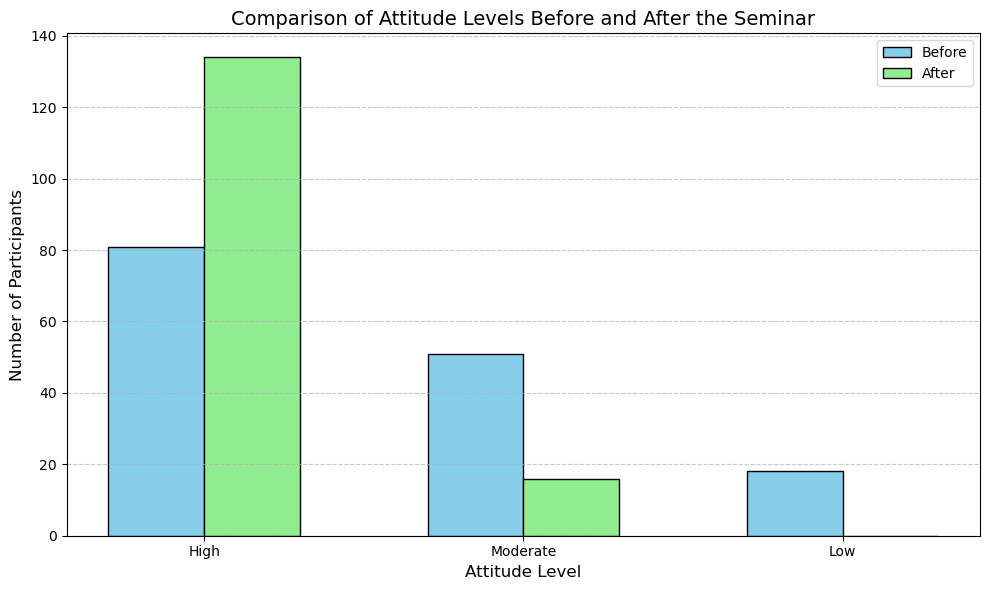

In [92]:
bar_width = 0.3 
filtered_data = attitude_summary_table[attitude_summary_table['Attitude Level']!= "Total Participants"] 
x = range(len(filtered_data))
plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], filtered_data['Before (Attitude_Level_1)'], 
        width=bar_width, label='Before', color='skyblue', edgecolor='black')
plt.bar([i + bar_width/2 for i in x], filtered_data['After (Attitude_Level_2)'], 
        width=bar_width, label='After', color='lightgreen', edgecolor='black')
plt.title('Comparison of Attitude Levels Before and After the Seminar', fontsize=14)
plt.xlabel('Attitude Level', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.xticks(ticks=x, labels=filtered_data['Attitude Level'], rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Conclusion:The data indicates that the intervention effectively enhanced participants' awareness and attitude towards breast cancer prevention. A significant number of participants shifted from the "moderate" and "low" attitude categories to the "high" attitude level, with an overall increase of 53 participants adopting a more positive attitude on breast cancer prevention. This suggests that the educational seminar had a meaningful impact on raising awareness about breast cancer. However, no statistically significant relationship was found between attitude toward breast cancer prevention and the factors tested except for the year of study (p < 0.02) as indicated by chi-square, as the p-value was greater than 0.05. As a result, I fail to reject the null hypothesis, indicating that these factors may not be strongly associated with attitudes toward breast cancer prevention in the studied population.